In [219]:
# Hesham Omar 20200060
# Assignment-2
# Logistic_Regression_&_Naïve-Bayes_classifier
# confusion matrix, cross validation, accuracy, presecion, recall, fmeasure

#1 importing libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [220]:
#2 importing data
#we can import from drive
dataset=pd.read_csv('/content/nba_logreg.csv')
dataset = dataset.reset_index()
#choose the part of data sheet you want to process
# we only want to choose 1st and 2nd columns
x=dataset.iloc[:,2:21].values
y=dataset.iloc[:,21].values
print(x)
print(y)


[[36.  27.4  7.4 ...  0.4  0.4  1.3]
 [35.  26.9  7.2 ...  1.1  0.5  1.6]
 [74.  15.3  5.2 ...  0.5  0.3  1. ]
 ...
 [43.  12.1  5.4 ...  0.3  0.4  0.9]
 [52.  12.   4.5 ...  0.4  0.1  0.8]
 [47.  11.7  4.4 ...  0.7  0.1  0.9]]
[0 0 0 ... 0 1 1]


In [221]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split
#assign test data size 25%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [222]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=10000)
regressor.fit(x_train,y_train)
y_pred= regressor.predict(x_test)

In [223]:
# evaluating performance

#1 accuracy
#importing accuracy score
from sklearn.metrics import accuracy_score

#printing the accuracy of the model
print(accuracy_score(y_pred,y_test))

0.7189054726368159


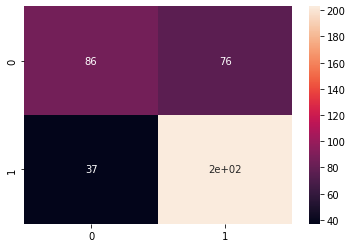

In [224]:
#2 confusion matrix
# importing modules
import seaborn as sns # visual analysis for confusion matrix
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
#plt.savefig('confusion.png')

In [225]:
# --recall
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
print (f"Recall: {recall}")     # fstring

Recall: 0.8458333333333333


In [226]:
# --precision
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred)
print (f"Precision: {precision}")

Precision: 0.7275985663082437


In [227]:
# --F-score, F1-score, F-measure, F1-measure
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred)
print (f"F-score: {f1}")

F-score: 0.7822736030828517


In [228]:
#3 cross validation
from sklearn.model_selection import StratifiedKFold
num_splits = 5
kfold = StratifiedKFold(num_splits, shuffle= True, random_state = 1)
train_accs, test_accs = [], []  #create empty lists to store accurcy values
for train_index, test_index in kfold.split(x, y):  #Generate indices to split data into training and test set.
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    regressor.fit(x_train, y_train)
    y_pred_train = regressor.predict(x_train)
    y_pred_test = regressor.predict(x_test)
    
    train_accs.append(metrics.accuracy_score(y_train, y_pred_train) * 100)
    test_accs.append(metrics.accuracy_score(y_test, y_pred_test) * 100)
ave_train_acc = 0
ave_test_acc = 0

print("\t","Training_Acc","\t","\t", "Testing_Acc")

for i in range(num_splits):
    print(i,"\t", train_accs[i],"\t", test_accs[i])
    
    ave_train_acc+= train_accs[i]/num_splits
    ave_test_acc+= test_accs[i]/num_splits
    
print("Av", "\t", ave_train_acc,"\t","\t", ave_test_acc)

	 Training_Acc 	 	 Testing_Acc
0 	 72.01492537313433 	 69.40298507462687
1 	 72.10820895522389 	 69.40298507462687
2 	 71.54850746268657 	 72.01492537313433
3 	 71.73507462686567 	 71.26865671641791
4 	 72.20149253731343 	 70.8955223880597
Av 	 71.92164179104478 	 	 70.59701492537313


In [229]:
# applying naive bayes classifier
# applying bernouli naive bayes classifier because our target data (y) is binary
# importing classifier
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
classifer = BernoulliNB()

# training the model
classifer.fit(x_train, y_train)

# testing the model
y_pred = classifer.predict(x_test)

In [230]:
# evaluating performance 

#1 accuracy
# importinging accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.6231343283582089


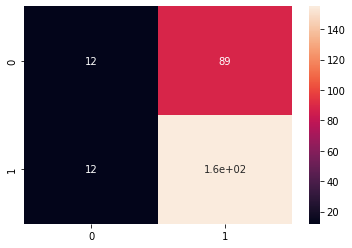

In [231]:
#2 confusion matrix
# importing modules
import seaborn as sns # visual analysis for confusion matrix
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
#plt.savefig('confusion.png')

In [232]:
# --recall
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
print (f"Recall: {recall}")

Recall: 0.9281437125748503


In [233]:
# --precision
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred)
print (f"Precision: {precision}")

Precision: 0.6352459016393442


In [234]:
# --F-score, F1-score, F-measure, F1-measure
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred)
print (f"F-score: {f1}")

F-score: 0.754257907542579


In [235]:
#3 cross validation
from sklearn.model_selection import StratifiedKFold
num_splits = 5
kfold = StratifiedKFold(num_splits, shuffle= True, random_state = 1)
train_accs, test_accs = [], []  #create empty lists to store accurcy values
for train_index, test_index in kfold.split(x, y):  #Generate indices to split data into training and test set.
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    classifer.fit(x_train, y_train)
    y_pred_train = classifer.predict(x_train)
    y_pred_test = classifer.predict(x_test)
    
    train_accs.append(metrics.accuracy_score(y_train, y_pred_train) * 100)
    test_accs.append(metrics.accuracy_score(y_test, y_pred_test) * 100)
ave_train_acc = 0
ave_test_acc = 0

print("\t","Training_Acc","\t","\t", "Testing_Acc")

for i in range(num_splits):
    print(i,"\t", train_accs[i],"\t", test_accs[i])
    
    ave_train_acc+= train_accs[i]/num_splits
    ave_test_acc+= test_accs[i]/num_splits
    
print("Av", "\t", ave_train_acc,"\t","\t", ave_test_acc)

	 Training_Acc 	 	 Testing_Acc
0 	 62.31343283582089 	 66.7910447761194
1 	 64.27238805970148 	 59.70149253731343
2 	 63.059701492537314 	 63.80597014925373
3 	 63.24626865671642 	 63.43283582089553
4 	 63.61940298507462 	 62.31343283582089
Av 	 63.30223880597015 	 	 63.2089552238806
